In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
    #Malgun 
%matplotlib inline

In [2]:
bike = pd.read_csv('../data2/bike_day.txt')
corona = pd.read_csv('../data2/corona_day.txt')

In [3]:
# 데이터 합치기(방법 여러개있음)
all = corona.merge(bike, left_on=['날짜'],right_on=['날짜'])

In [4]:
# all = pd.concat([bike,corona],ignore_index=True,axis=1)
#이거로하면 몇번 더 바꾸는 과정 거쳐야해서 조금 복잡하지만 그래도 가능함

In [5]:
all

,Unnamed: 0,날짜,확진자수,대여일자,이용건수
0,0,202001,7,202001,794162
1,1,202002,80,202002,762274
2,2,202003,391,202003,1533535
3,3,202004,156,202004,2157390
4,4,202005,229,202005,2480330
5,5,202006,459,202006,2770847
6,6,202007,281,202007,2582775
7,7,202008,2415,202008,1734558
8,8,202009,1306,202009,2811710
9,9,202010,733,202010,2891772


In [6]:
# 이상한 컬럼 삭제
all.drop('Unnamed: 0',axis=1, inplace=True)

In [7]:
# 날짜 컬럼을 날짜형식으로 바꿔줌
all['날짜'] = pd.to_datetime(all['날짜'],format='%Y%m')
all

,날짜,확진자수,대여일자,이용건수
0,2020-01-01,7,202001,794162
1,2020-02-01,80,202002,762274
2,2020-03-01,391,202003,1533535
3,2020-04-01,156,202004,2157390
4,2020-05-01,229,202005,2480330
5,2020-06-01,459,202006,2770847
6,2020-07-01,281,202007,2582775
7,2020-08-01,2415,202008,1734558
8,2020-09-01,1306,202009,2811710
9,2020-10-01,733,202010,2891772


AttributeError: 'Rectangle' object has no property 'markersize'

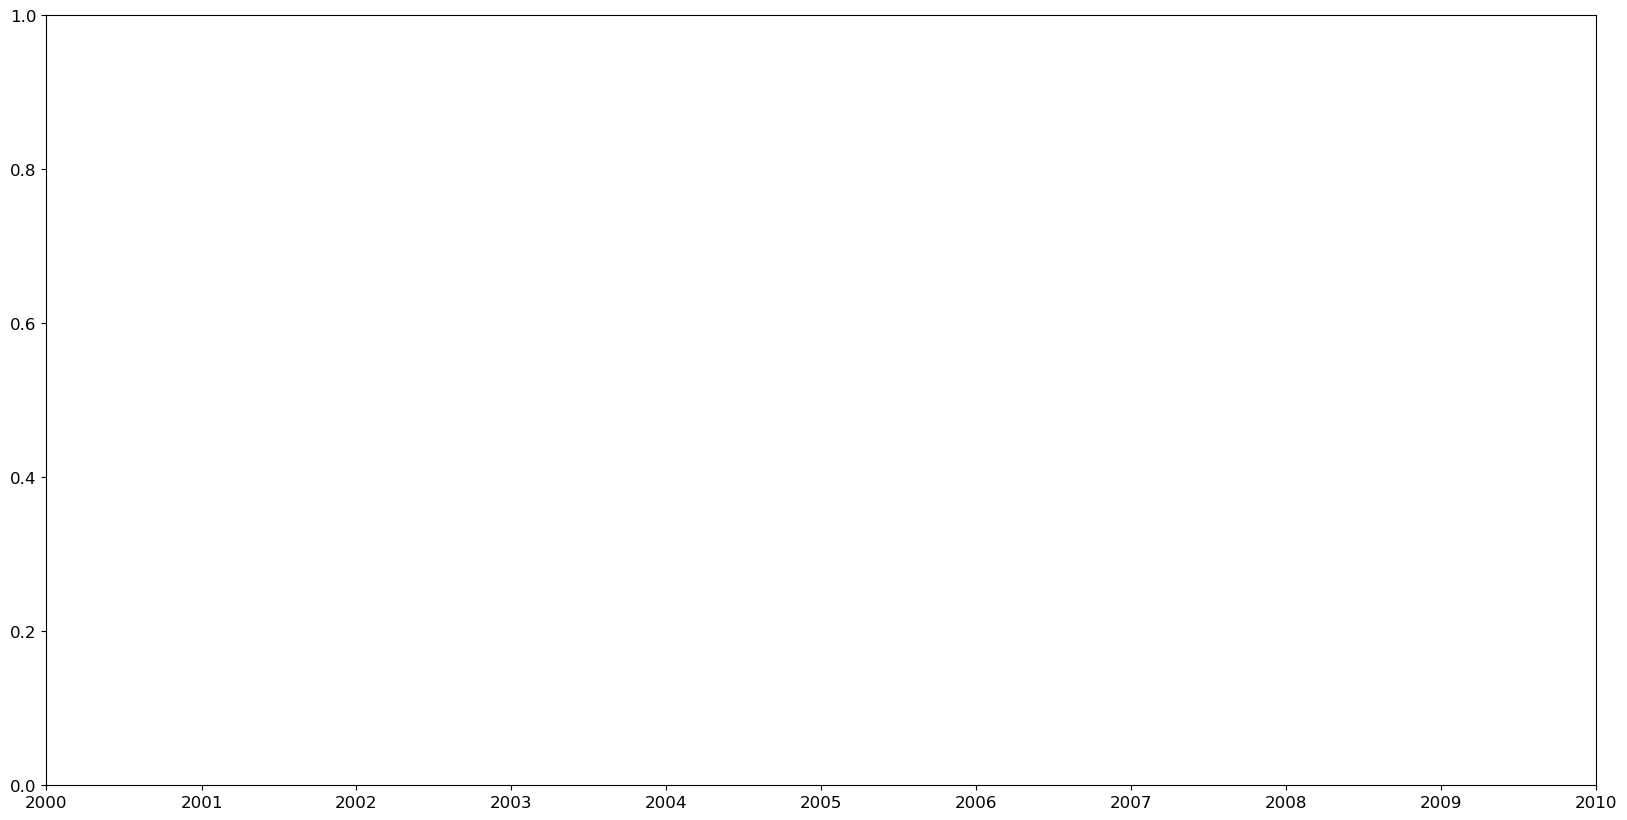

In [8]:
#1번방법
plt.style.use('default')
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots()
ax1.bar(all['날짜'], all['확진자수'], color='green',alpha=0.7,label='따릉이 이용건수')

ax2 = ax1.twinx()
ax2.bar(all['날짜'], all['이용건수'], color='deeppink', label='확진자수', alpha=0.8, width=3)
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

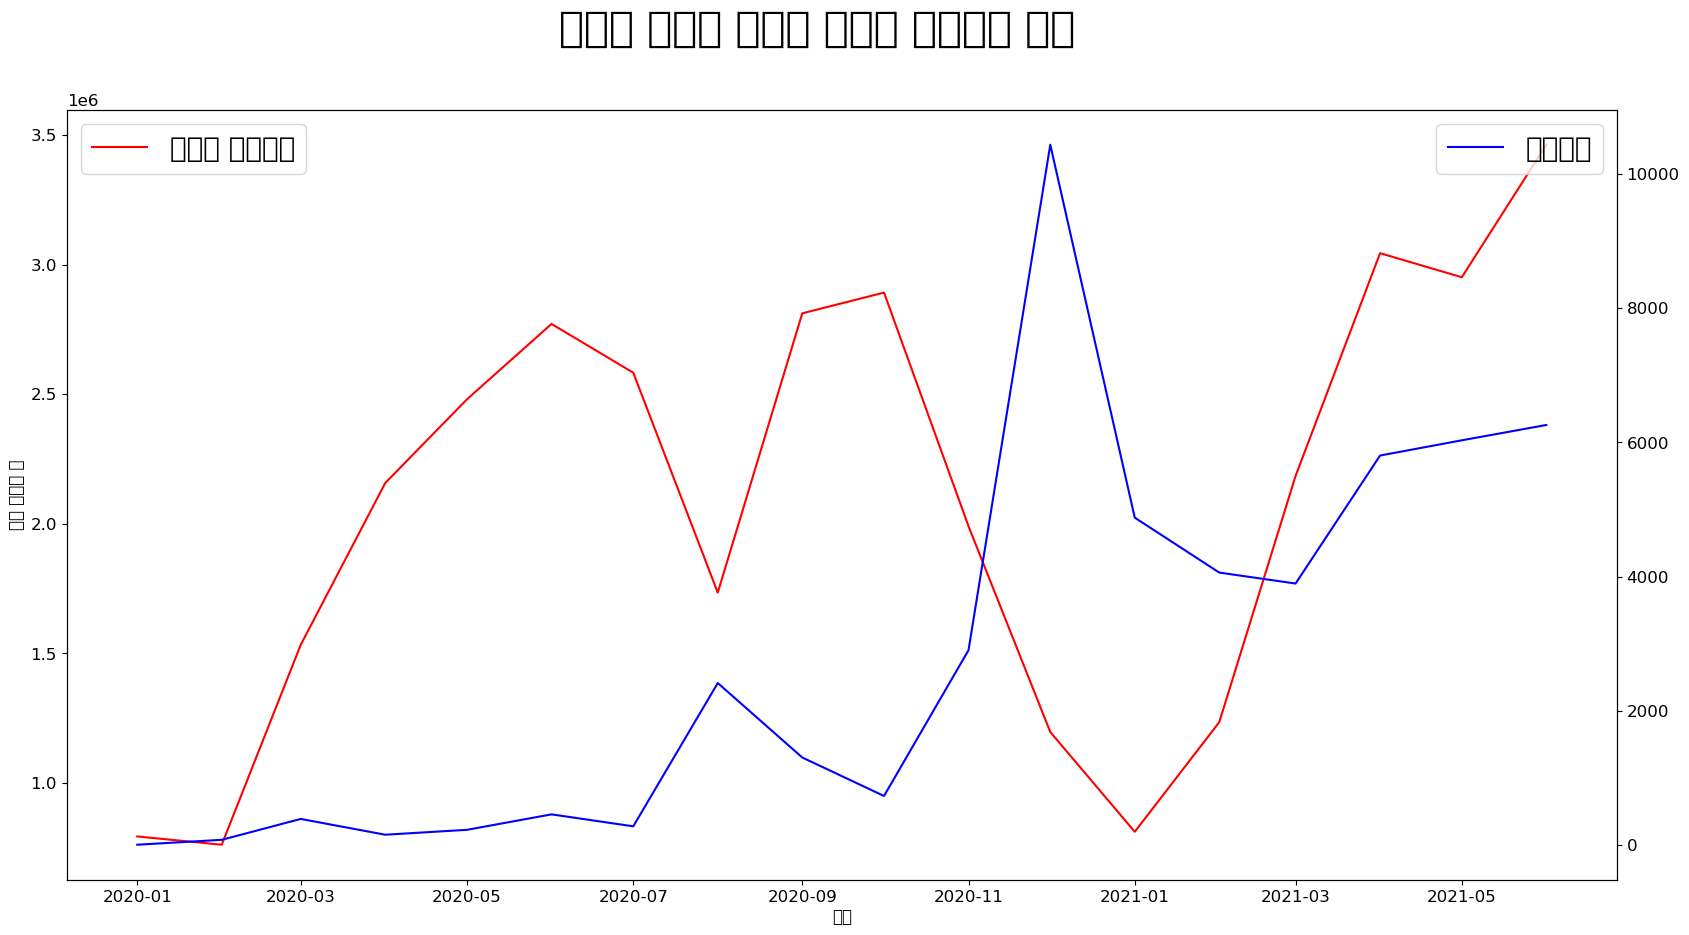

<Figure size 3000x2000 with 0 Axes>

In [68]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax1 = plt.subplots()
plt.figure(figsize=(30,20))
ax1.plot(all['날짜'], all['이용건수'], color='red', label='따릉이 이용건수')
ax2 = ax1.twinx()
ax2.plot(all['날짜'], all['확진자수'], color='blue', label='확진자수')
fig.suptitle('서울시 코로나 진행과 따릉이 이용건수 추이', fontsize=30)
ax1.set_xlabel('일자')
ax1.set_ylabel('이용건수')
ax1.set_ylabel('일별 확진자 수')
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
plt.show()

In [ ]:
#이렇게보면 유의미한 데이터를 찾은 것 같지만 하나로는 안된다.